## Importing libraries

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# plotting train and test error

import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(training, epochs):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_values = list(range(1,epochs+1))

    validation_loss = training.history['val_loss']
    train_loss = training.history['loss']   
    
    ax.plot(x_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()

## 2 conv layers, kernels =(3x3), Max pooling =(2x2)

In [0]:
%%time

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

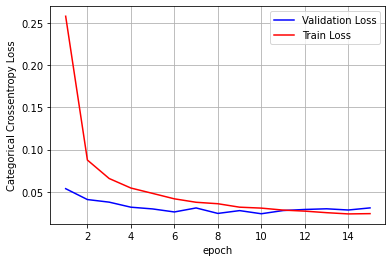

In [0]:
plot_loss(training, epochs)

from epoch 11 it starts overfitting. Best epoch is 10

## 2 conv layers, kernels =(5x5) max pooling = (2X2)

In [0]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               819328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

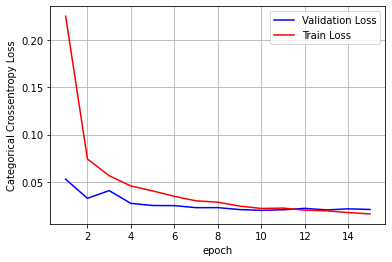

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 11. It starts overfitting after 11 epochs.
Here best accuracy is 99.37

## 3 conv layers, kernels = (7x7),(5x5),(3x3), max pooling =(2x2)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 3, 128)        

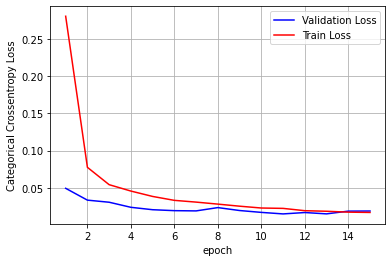

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 13. Its overfitting from epoch 14 onwards.Best accuracy is 99.55%

## 2 conv layers, kernels =(3x3),(3x3),Max pooling = (2x2), padding = same

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding ='same',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)              

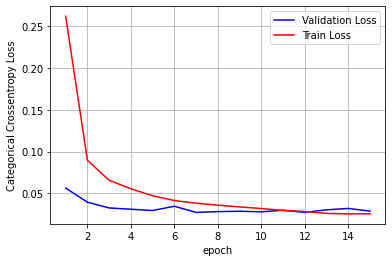

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 10. Its overfitting from epoch 11. Best accuracy is 99.17%

## 3 conv layers, kernels = (7x7),(5x5),(3x3), padding =same

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu', padding ='same',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 128)        

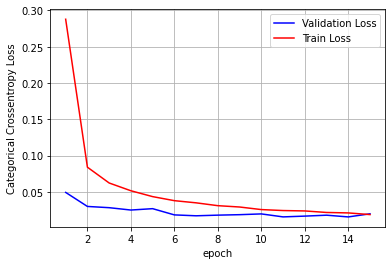

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 7. Best accuracy 99.43%

## 3 conv layers, kernels=(5x5), padding = same, strides= 1

In [0]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (5,5), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding = 'same',strides=1))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 80)          128080    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 80)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6, 6, 80)         

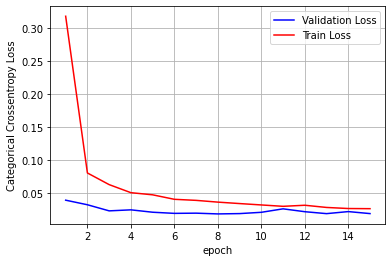

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 9. Best accuracy 99.42%

## 3 conv layers, kernels =(7x7), padding = same, strides =1,2

In [0]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu', padding ='same',strides=1,
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (7,7), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding = 'same',strides=2))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 80)          250960    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 80)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 80)         

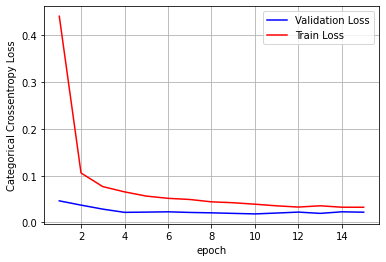

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 5. best accuracy 99.31%

## 3 conv layers, kernels = (7x7), max pooling =(2x2), strides=2,1

In [0]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(80, (7,7), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding = 'same',strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        100416    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 80)          250960    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 80)         

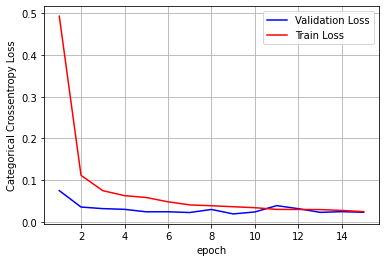

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 7. Best accuracy 99.34%

## 3 conv layers, kernels = (5x5), strides =1, max pooling = (2x2), padding = same

In [0]:
%%time

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu', strides =1,
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(80, (5,5), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding = 'same',strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 80)          128080    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 80)         

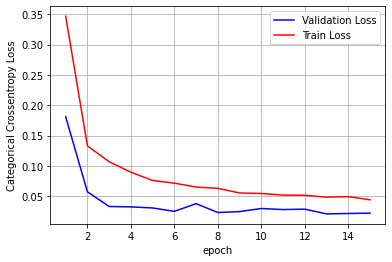

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 9. best accuracy 99.40%

## 3 conv layers, kernels=(3x3), max pooling =(2x2), padding =same, strides = 1

In [0]:
%%time

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(80, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding = 'same',strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 80)        46160     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 80)       

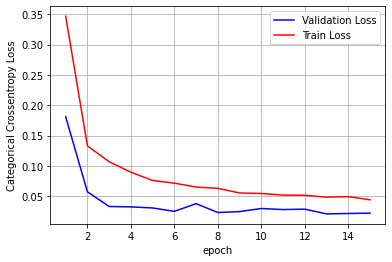

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 8. best accuracy 99.37%

## Summary

In [1]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Layers","Kernels", "Test Accuracy","epoch"]
pt.add_row(["2","(3x3),(3x3)","99.21","10"])
pt.add_row(["2","(5x5),(5x5)","99.37","11"])
pt.add_row(["3","(7x7),(5x5),(3x3)","99.55","13"])
print(pt)

+--------+-------------------+---------------+-------+
| Layers |      Kernels      | Test Accuracy | epoch |
+--------+-------------------+---------------+-------+
|   2    |    (3x3),(3x3)    |     99.21     |   10  |
|   2    |    (5x5),(5x5)    |     99.37     |   11  |
|   3    | (7x7),(5x5),(3x3) |     99.55     |   13  |
+--------+-------------------+---------------+-------+


In [2]:
pt = PrettyTable()
pt.field_names = ["Layers","Kernels", "Test Accuracy","epoch", "padding"]
pt.add_row(["2","(3x3),(3x3)","99.17","10","same"])
pt.add_row(["3","(7x7),(5x5),(3x3)","99.43","7","same"])
print(pt)

+--------+-------------------+---------------+-------+---------+
| Layers |      Kernels      | Test Accuracy | epoch | padding |
+--------+-------------------+---------------+-------+---------+
|   2    |    (3x3),(3x3)    |     99.17     |   10  |   same  |
|   3    | (7x7),(5x5),(3x3) |     99.43     |   7   |   same  |
+--------+-------------------+---------------+-------+---------+


In [3]:
pt = PrettyTable()
pt.field_names = ["Layers","Kernels", "Test Accuracy", "epoch", "padding","strides"]
pt.add_row(["3","(3x3),(3x3),(3x3)","99.42","9","same","1"])
pt.add_row(["3","(5x5),(5x5),(5x5)","99.34","5","same","1"])
pt.add_row(["3","(7x7),(7x7),(7x7)","99.40","9","same","2"])
pt.add_row(["3","(7x7),(7x7),(7x7)","99.37","8","same","1,2"])
print(pt)

+--------+-------------------+---------------+-------+---------+---------+
| Layers |      Kernels      | Test Accuracy | epoch | padding | strides |
+--------+-------------------+---------------+-------+---------+---------+
|   3    | (3x3),(3x3),(3x3) |     99.42     |   9   |   same  |    1    |
|   3    | (5x5),(5x5),(5x5) |     99.34     |   5   |   same  |    1    |
|   3    | (7x7),(7x7),(7x7) |     99.40     |   9   |   same  |    2    |
|   3    | (7x7),(7x7),(7x7) |     99.37     |   8   |   same  |   1,2   |
+--------+-------------------+---------------+-------+---------+---------+


# 3 conv layers, kernels = (7x7),(5x5),(3x3), Using sigmoid

In [0]:
%%time

model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 3, 128)        

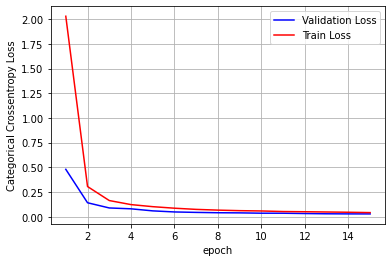

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 15. best accuracy is 99.02%

## 3 conv layers, kernels = (7x7),(5x5),(3x3), Using tanh

In [0]:
%%time

model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='tanh'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 3, 128)        

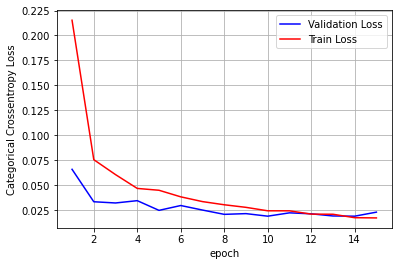

In [0]:
# plotting train and test error
plot_loss(training, epochs)

best epoch is 5. best accuracy is 99.30%

In [4]:
pt = PrettyTable()
pt.field_names = ["Layers","Kernels", "Test Accuracy", "epoch","activation"]
pt.add_row(["2","(7x7),(5x5),(3x3)","99.02","15","sigmoid"])
pt.add_row(["3","(7x7),(5x5),(3x3)","99.30","5","tanh"])
print(pt)

+--------+-------------------+---------------+-------+------------+
| Layers |      Kernels      | Test Accuracy | epoch | activation |
+--------+-------------------+---------------+-------+------------+
|   2    | (7x7),(5x5),(3x3) |     99.02     |   15  |  sigmoid   |
|   3    | (7x7),(5x5),(3x3) |     99.30     |   5   |    tanh    |
+--------+-------------------+---------------+-------+------------+


### As number of convolution layers increase test accuracy also increased.